In [71]:
#Import needed modules
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
root_path = '/Users/willbarnes/Documents/Rice/Research/'
sys.path.append(os.path.join(root_path,'boilerplate/'))
sys.path.append(os.path.join(root_path,'EBTEL_analysis/src'))
import io_handlers as ioh
import ebtel_run as ebr
import ebtel_configure as ebc
import ebtel_plot as ebp

# $\psi_C$ term comparison in `EBTEL-2fl`

When "EBTEL-izing" the two-fluid hydrodynamic equations, it becomes necessary to integrate the $v\partial p_e/\partial s$ term over both the corona and the transition region so that we have terms of the form,
$$
\psi_{C} = \int_{C}\mathrm{d}s\,v\frac{\partial p_e}{\partial s},\\
\psi_{TR} = \int_{TR}\mathrm{d}s\,v\frac{\partial p_e}{\partial s},
$$
where the integrals are taken over the corona and transition region, respectively. The $\psi_{TR}$, it turns out, involves heat flux and radiation terms. But what about $\psi_C$? Integrating by parts,
$$
\psi_{C} = \int_{C}\mathrm{d}s\,v\frac{\partial p_e}{\partial s} = \int_{C}v\mathrm{d}p_e = (p_ev)\big|_C - \int_Cp_e\mathrm{d}v = -(p_ev)_0 - \int_Cp_e\mathrm{d}v.
$$
Taking $p_e$ outside of the integral as $\bar{p_e}$ and again assuming that $v_a=0$, we get 
$$
\psi_C = -(p_ev)_0 - \bar{p_e}\int_C\mathrm{d}v = -(p_ev)_0 + \bar{p_e}v_0, 
$$
which yields $\psi_C\approx0$. 

Currently, `EBTEL-2fl` uses the expression 
$$
\psi_C = p_{e,a}\bar{v} - (p_ev)_0.
$$
This is not a very good approximation though below we will show that it really doesn't make too much of a difference as its contribution to the electron and ion energy equations is small.

## `EBTEL-2fl` Runs

We can scale all of our other terms by $\psi_C$ so as to easily see the importance of the contributions of all terms involved. In this way, our electron energy equation can be written,
$$
\frac{L}{(\gamma - 1)\psi_C}\frac{dp_e}{dt} = \frac{\psi_{TR}}{\psi_C} + 1 - \frac{R_{TR}+R_C}{\psi_C} + \frac{Lk_B}{\gamma - 1}\frac{n\nu_{ei}(T_i - T_e)}{\psi_C} + L\frac{E_H}{\psi_C}.
$$

We will compute each of the terms on the right hand side and plot it as a function of time to see how it compares to the contribution from $\psi_C$.

Set up the runner object.

In [78]:
runner = ebr.Runner(os.path.join(root_path,'EBTEL-2fluid_repo/bin/'),'')

All of our debug output and results are going to the following files

In [101]:
debug_output_file = os.path.join(root_path,'research_notebook/EBTEL/ebtel_data/psi_C_testing_debug.txt')

Create an instance of the plotting function

In [102]:
plotter = ebp.Plotter(parent_dir='',child=os.path.join(root_path,'research_notebook/EBTEL/ebtel_data/psi_C_testing'))

Unable to load heating event amplitudes.


Create a plotting function to show the differences for each scenario.

In [103]:
def make_psiC_figure(debug_fn):
    #load text
    data = np.fabs(np.loadtxt(debug_fn))
    #plotting
    fig = plt.figure(figsize=(12,8))
    ax = fig.gca()
    nR,nC = np.shape(data)
    labels = [r'$\psi_{TR}$',r'radiation',r'heating',r'collisions']
    for i in range(1,nC):
        ax.plot(data[:,0],data[:,i],label=labels[i-1],linewidth=2)
    ax.axhline(y=1,linestyle='dotted',linewidth=2,color='black')
    ax.plot(data[:,0],data[:,1] + data[:,2]+data[:,3]+data[:,4],label=r'sum',color='black',
           linestyle='solid')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'$t$ (s)',fontsize=20)
    ax.set_ylabel(r'$\phi/\psi_C$',fontsize=20)
    ax.set_xlim([data[0,0],data[-1,0]])
    ax.legend(loc='best',fontsize=18)
    plt.show()

### Short pulse, electron heating

Here, we'll use $\tau=100$ s, $h_0=0.3$ erg cm$^{-3}$ s$^{-1}$, and heat only the electrons.

In [109]:
runner.run_ebtel_single(os.path.join(root_path,'EBTEL-2fluid_repo/config/ebtel_config.xml'),
                        verbose=False)

Unable to load heating event amplitudes.


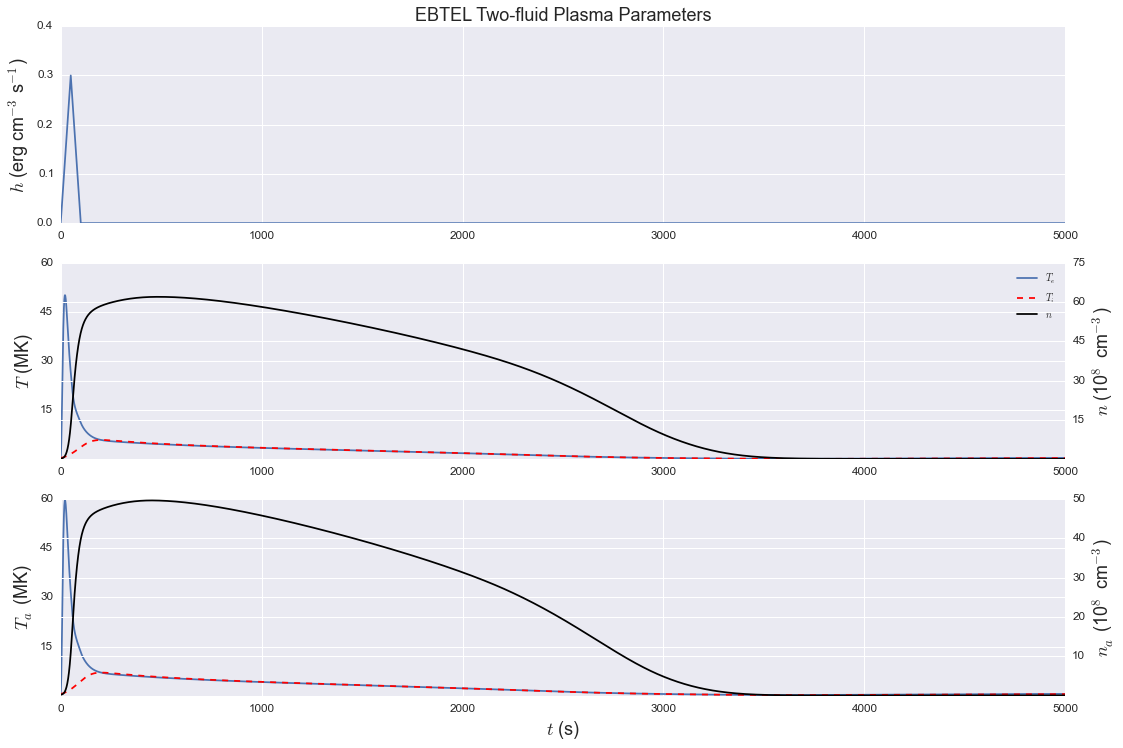

In [110]:
plotter.load_variables()
plotter.plot_params()

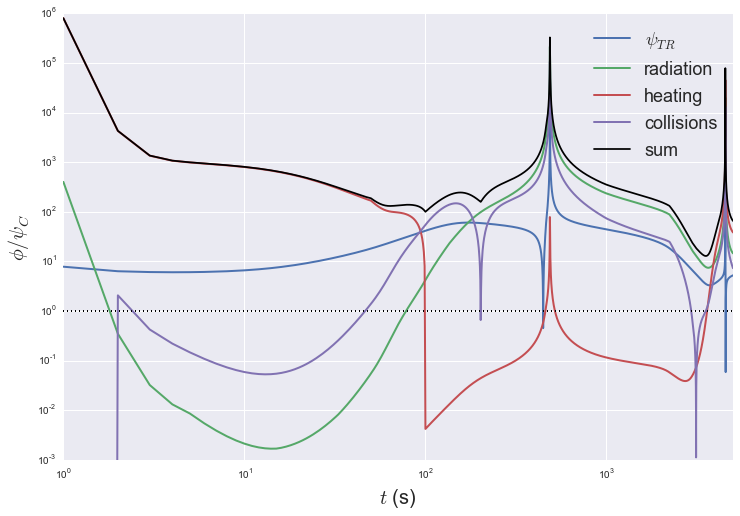

In [111]:
make_psiC_figure(debug_output_file)

### Long pulse, electron heating

Now, lengthen the pulse and conserve the amount of energy we are dumping into the loop such that $\tau=500$ s and $h_0=0.06$ erg cm$^{-3}$ s$^{-1}$.

In [107]:
runner.run_ebtel_single(os.path.join(root_path,'EBTEL-2fluid_repo/config/ebtel_config.xml'),
                        verbose=False)

Unable to load heating event amplitudes.


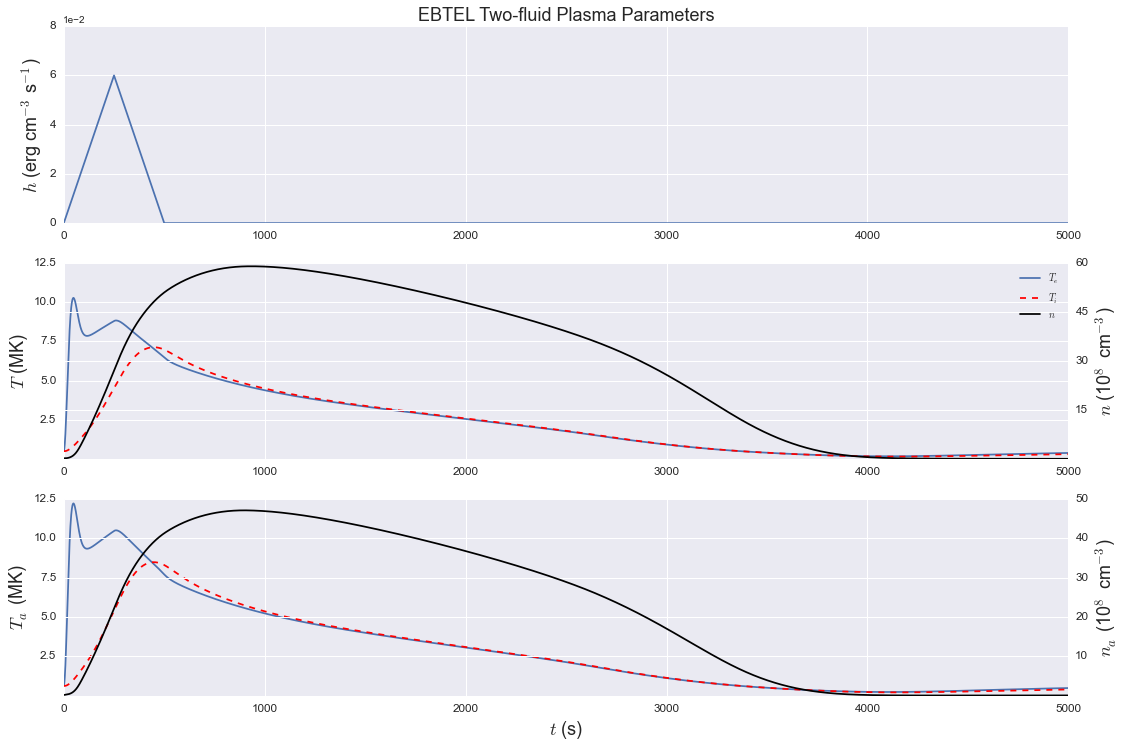

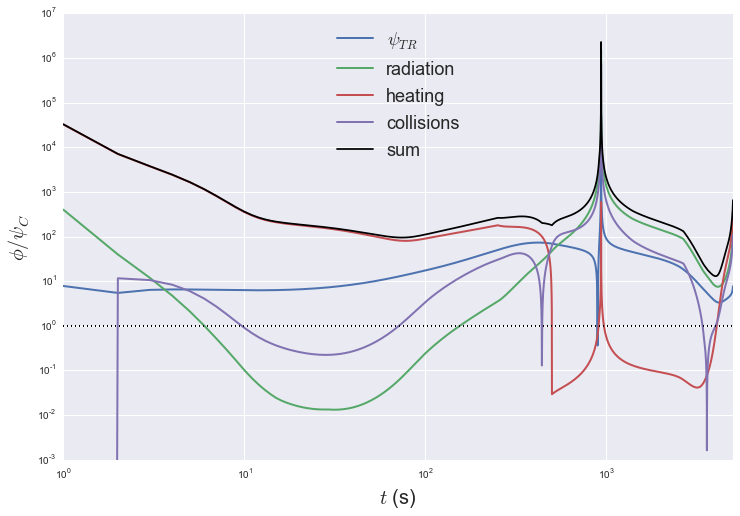

In [108]:
plotter.load_variables()
plotter.plot_params()
make_psiC_figure(debug_output_file)

### Short pulse, ion heating

Now do the short pulse scenario, heating the ions instead of the electrons.

Unable to load heating event amplitudes.


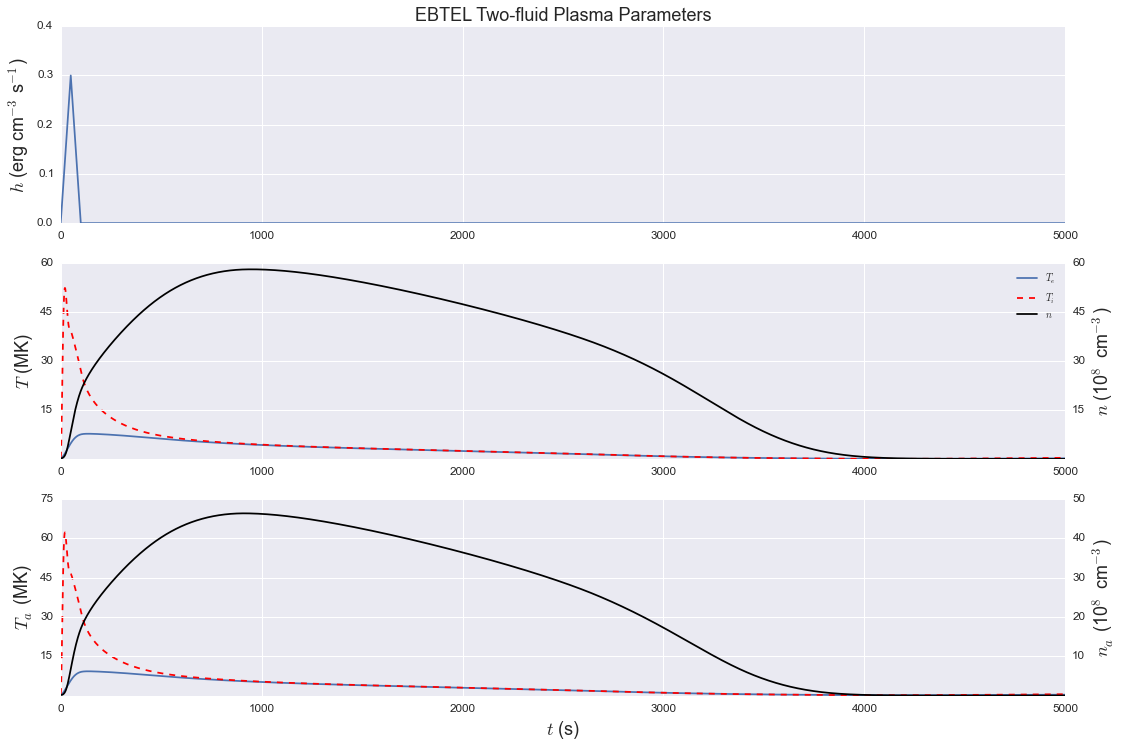

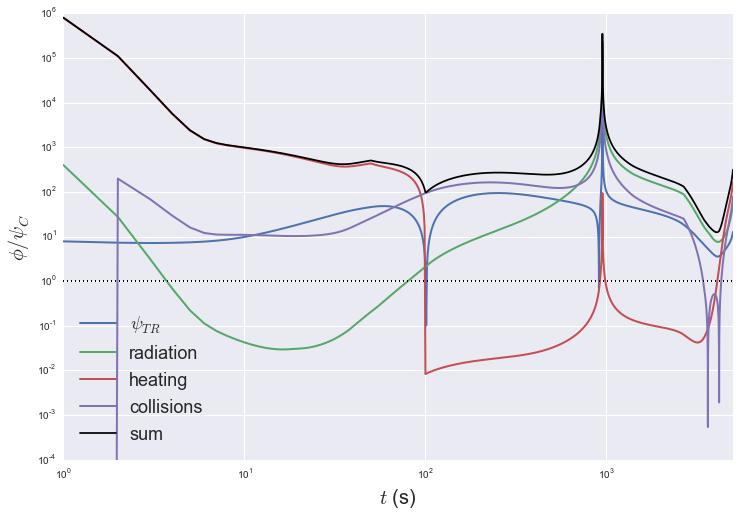

In [112]:
runner.run_ebtel_single(os.path.join(root_path,'EBTEL-2fluid_repo/config/ebtel_config.xml'),
                        verbose=False)
plotter.load_variables()
plotter.plot_params()
make_psiC_figure(debug_output_file)

### Long pulse, ion heating

Unable to load heating event amplitudes.


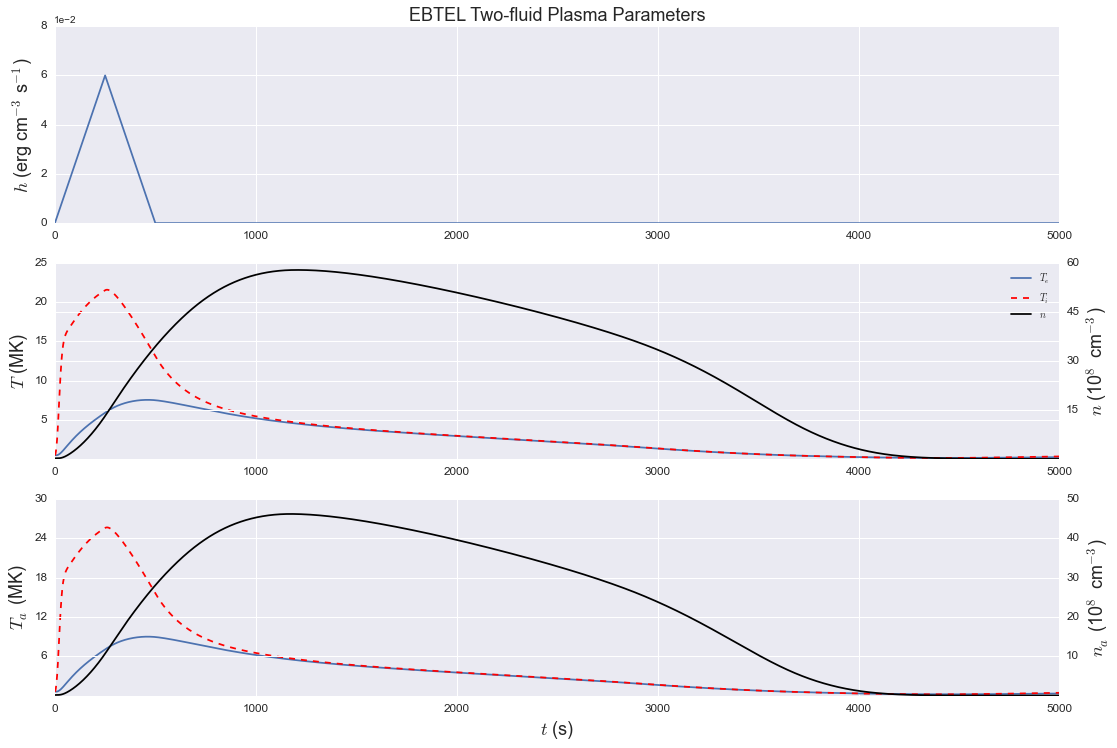

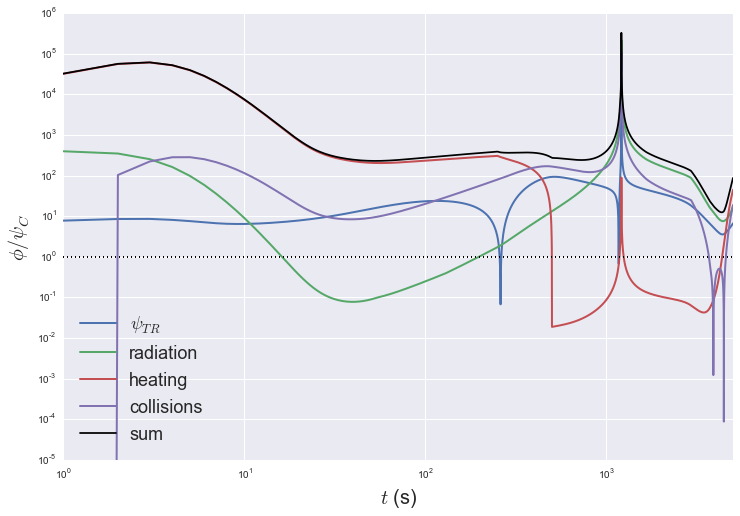

In [113]:
runner.run_ebtel_single(os.path.join(root_path,'EBTEL-2fluid_repo/config/ebtel_config.xml'),
                        verbose=False)
plotter.load_variables()
plotter.plot_params()
make_psiC_figure(debug_output_file)